# Consumer Complaint

**Business Problem :** Create a model which predict the Product as the output when consumer provide it's complaint as the input

**Dataset:** [consumer complaint dataset location](https://www.kaggle.com/sebastienverpile/consumercomplaintsdata/home) https://catalog.data.gov/dataset/consumer-complaint-database

**dataset information:**
Date received
ProductCompany product for which complaint is being filed
Sub-product
IssueProblem with product
Sub-issue
Consumer complaint narrativeDetails of the complaint
Company public response
Company
State
ZIP code
Tags
Consumer consent provided?
Submitted via
Date sent to company
Company response to consumer
Timely response?
Consumer disputed?
Complaint ID

Consumer Financial Protection Bureau — These are complaints we’ve received about financial products and services.

This problem is multi class text classification problem.

So let's get started,

We will import required library for dataset analysis like
1. numpy
2. scipy
3. matplotlib
4. seaborn
5. skelarn
6. nltk           

In [81]:
#Library


import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sc
import matplotlib.pyplot as plt
import warnings

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import HashingVectorizer,TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc,roc_auc_score

In [82]:
warnings.filterwarnings('ignore')

1. pandas read_csv will load the dataset from home location of notebook as we have kept dataset there
2. To take overlook of the dataset , we will print only first 5 rows of the dataset


In [83]:
%time dt_original=pd.read_csv("Consumer_Complaints.csv")

Wall time: 10.2 s


In [84]:
dt_original.head(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,3/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,3/17/2014,Closed with explanation,Yes,No,759217
1,10/1/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/5/2016,Closed with explanation,Yes,No,2141773
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100
3,6/8/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,6/10/2014,Closed with explanation,Yes,Yes,885638
4,9/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,9/13/2014,Closed with explanation,Yes,Yes,1027760


1. by default head() is not print all the dataset features so lets Transpose it so that it will display index as features name and will get fair idea about the dataset

In [85]:
dt_original.head(5).T

,0,1,2,3,4
Date received,3/12/2014,10/1/2016,10/17/2016,6/8/2014,9/13/2014
Product,Mortgage,Credit reporting,Consumer Loan,Credit card,Debt collection
Sub-product,Other mortgage,NaN,Vehicle loan,NaN,Credit card
Issue,"Loan modification,collection,foreclosure",Incorrect information on credit report,Managing the loan or lease,Bankruptcy,Communication tactics
Sub-issue,NaN,Account status,NaN,NaN,Frequent or repeated calls
Consumer complaint narrative,NaN,I have outdated information on my credit repor...,I purchased a new car on XXXX XXXX. The car de...,NaN,NaN
Company public response,NaN,Company has responded to the consumer and the ...,NaN,NaN,NaN
Company,M&T BANK CORPORATION,"TRANSUNION INTERMEDIATE HOLDINGS, INC.","CITIZENS FINANCIAL GROUP, INC.",AMERICAN EXPRESS COMPANY,"CITIBANK, N.A."
State,MI,AL,PA,ID,VA
ZIP code,48382,352XX,177XX,83854,23233


1. from the info of the dataset , we will get data type of feautures and missing value columns name
2. it's look like dataset has almost 900K rows which is huge in size, so may be we will face some memory error on all dataset while training , lets check it later

In [86]:
dt_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903983 entries, 0 to 903982
Data columns (total 18 columns):
Date received                   903983 non-null object
Product                         903983 non-null object
Sub-product                     668823 non-null object
Issue                           903983 non-null object
Sub-issue                       426386 non-null object
Consumer complaint narrative    199970 non-null object
Company public response         257981 non-null object
Company                         903983 non-null object
State                           894758 non-null object
ZIP code                        894705 non-null object
Tags                            126038 non-null object
Consumer consent provided?      375434 non-null object
Submitted via                   903983 non-null object
Date sent to company            903983 non-null object
Company response to consumer    903983 non-null object
Timely response?                903983 non-null object
Consumer 

In [87]:
dt_original.shape

(903983, 18)

In [88]:
dt_original.isnull().sum()/len(dt_original)*100

Date received                    0.000000
Product                          0.000000
Sub-product                     26.013764
Issue                            0.000000
Sub-issue                       52.832520
Consumer complaint narrative    77.879009
Company public response         71.461742
Company                          0.000000
State                            1.020484
ZIP code                         1.026347
Tags                            86.057481
Consumer consent provided?      58.468909
Submitted via                    0.000000
Date sent to company             0.000000
Company response to consumer     0.000000
Timely response?                 0.000000
Consumer disputed?              14.979043
Complaint ID                     0.000000
dtype: float64

1. As per the problem , we will only care about the feature name 'Consumer complaint narrative' and target name 'Product' , so lets focus on only these feature and discards other one

In [89]:
df = dt_original[pd.notnull(dt_original['Consumer complaint narrative'])]
df.shape

(199970, 18)

1. from the dataset description its look like there are totally mismatch of count for the both the feature
2. as it is test , we can not handle it as missing value, so we will only take 199970 for our analysis
3. From Product, there are 18 different product type categories
4. from frequency , its look like some of the complaints are duplicate, so we need to remove duplicate rows

In [90]:
work_df=['Consumer complaint narrative','Product']
work_df=dt_original[work_df]
work_df.describe(include='all')

,Consumer complaint narrative,Product
count,199970,903983
unique,195317,18
top,I am filing this complaint because Experian ha...,Mortgage
freq,103,242194


Let's have look on complaint and overall count for each complaints, the first display complaint repeated almost 102 time

In [91]:
%time work_df['Consumer complaint narrative'].value_counts()

Wall time: 319 ms


I am filing this complaint because Experian has ignored my request to provide me with the documents that their company has on file that was used to verify the accounts I disputed. Being that they have gone past the 30 day mark and can not verify these accounts, under Section 611 ( 5 ) ( A ) of the FCRA - they are required to " ... promptly delete all information which can not be verified '' that I have disputed. Please resolve this manner as soon as possible. Thank you.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [132]:
%time work_df.drop_duplicates(subset ="Consumer complaint narrative",keep=False,inplace=True)
work_df.shape

Wall time: 2.4 s


(192429, 2)

1. after removing duplicate complaint data, only 192429 are remaining, as we deleted some of the duplicate data, th index of dataset get mismatch
2. so we need to reindex it again
3. now let's do the analysis of Target variable
4. form the graph , its look like, categories of target are imbalanced.
5. most of the complaints are from Debt collection, mortage, credit reporting, credit card

In [165]:
work_df = work_df.reset_index(drop=True)

Wall time: 248 ms


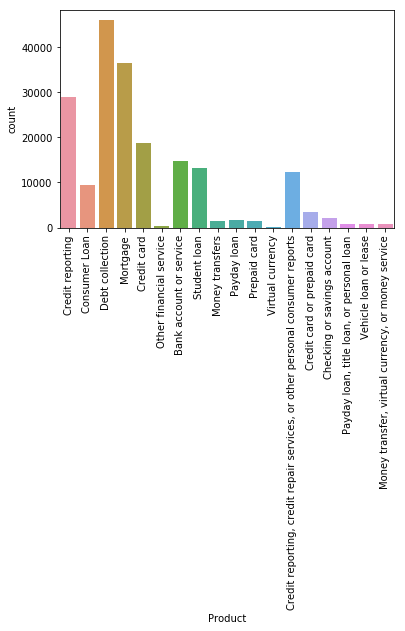

In [166]:
%time sns.countplot(work_df['Product'])
plt.xticks(rotation=90)
plt.show()

1. complaint contain lot of noisy data , to fit it better, we will remove noisy data by removing unwanted text from complain
2. after removind unwanted text, some how its look like better for model building

In [147]:
corpus=[]

for i in range(0,len(work_df['Consumer complaint narrative'])):
    review = re.sub(r'\W', ' ',str(work_df['Consumer complaint narrative'][i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+br\s+',' ',review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^b\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review)

In [148]:
corpus[1]

'i purchased new car on xxxx xxxx the car dealer called citizens bank to get 10 day payoff on my loan good till xxxx xxxx the dealer sent the check the next day when balanced my checkbook on xxxx xxxx noticed that citizens bank had taken the automatic payment out of my checking account at xxxx xxxx xxxx bank called citizens and they stated that they did not close the loan until xxxx xxxx stating that they did not receive the check until xxxx xxxx told them that did not believe that the check took that long to arrive xxxx told me check was issued to me for the amount overpaid they deducted additional interest today xxxx xxxx called citizens bank again and talked to supervisor named xxxx because on xxxx xxxx received letter that the loan had been paid in full dated xxxx xxxx but no refund check was included xxxx stated that they hold any over payment for 10 business days after the loan was satisfied and that my check would be mailed out on wed the xx xx xxxx questioned her about the dela

as dataset is large in size and our system CPU might handle it correctly so we will create 2 seperate dataset 
1. containing all data
2. containing first 30000 rows

wich second dataset, we need to take data such way that , it will contain all categories of target variable

(192429, 2)
Wall time: 104 ms


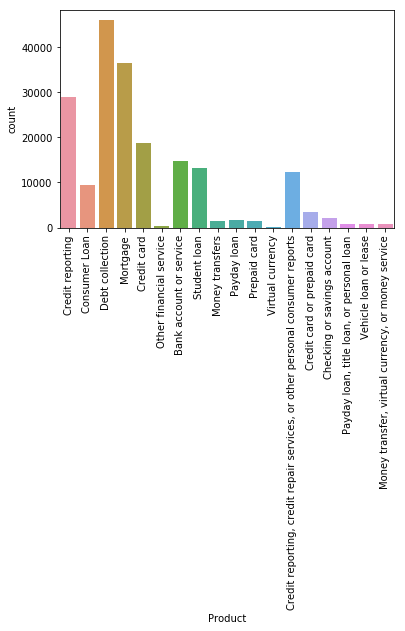

Debt collection                                                                 45901
Mortgage                                                                        36530
Credit reporting                                                                28846
Credit card                                                                     18691
Bank account or service                                                         14833
Student loan                                                                    13266
Credit reporting, credit repair services, or other personal consumer reports    12314
Consumer Loan                                                                    9402
Credit card or prepaid card                                                      3339
Checking or savings account                                                      2137
Payday loan                                                                      1734
Money transfers                                       

In [138]:
work_df1=work_df.iloc[0:192429,0:]
print(work_df1.shape)

%time sns.countplot(work_df1['Product'])
plt.xticks(rotation=90)
plt.show()

val=work_df1['Product'].value_counts()
print(val)

(25000, 2)
Wall time: 65.2 ms


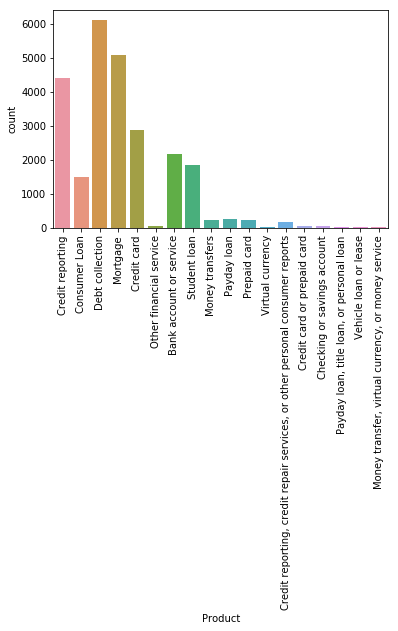

Debt collection                                                                 6097
Mortgage                                                                        5081
Credit reporting                                                                4389
Credit card                                                                     2861
Bank account or service                                                         2178
Student loan                                                                    1838
Consumer Loan                                                                   1496
Payday loan                                                                      265
Money transfers                                                                  236
Prepaid card                                                                     214
Credit reporting, credit repair services, or other personal consumer reports     168
Credit card or prepaid card                                      

In [139]:
work_df2=work_df.iloc[0:25000,0:]
print(work_df2.shape)

%time sns.countplot(work_df2['Product'])
plt.xticks(rotation=90)
plt.show()

val=work_df2['Product'].value_counts()
print(val)

1. To train model on training data , we need to convert it into numerical form
2. to convert words into vector form , we will use Hashing vectorizer with tf-idf transformer.
3. there are other methods or alternatives to handle this situation like TF-IDF vectorizer, counter vectorizer, word2vev, glove
4. now , we will only focus on sklearn methods
5. counter vectorizer is memory consuming and Bag of word model , so we will not consider it here.
6. we have option of TF-IDF vectorizer but combination of Hashing-TFIDF is more memory efficient.
7. with Hashing vectorizer, we have to give optin as stopword = 'english ' which remove stopword from dataset and n_gram range =(1,2) which gives better result than (1,1)

In [149]:
#Hashing & tf-idf vectoriser
vectorizer = HashingVectorizer(stop_words='english',ngram_range=(1, 2))
%time vect = vectorizer.fit_transform(corpus)

trans=TfidfTransformer()
%time trans_done=trans.fit_transform(vect)


Wall time: 47.4 s
Wall time: 13.5 s


to train and test the model on dataset , we will split dataset with 70% data for training & 30% data for testing purpose

In [150]:
X=trans_done
Y=work_df1["Product"]

X1_train,X1_test,Y1_train,Y1_test=train_test_split(X,Y,random_state=7,test_size=0.30)

In [ ]:
%timeit
pipeEse=[]
pipeEse.append(('tfidfAdaB',Pipeline([('AdaB',AdaBoostClassifier())])))
pipeEse.append(('tfidfdGB',Pipeline([('GB',GradientBoostingClassifier())])))
pipeEse.append(('tfidfRFR',Pipeline([('RFR',RandomForestClassifier())])))
pipeEse.append(('tfidfETR',Pipeline([('ETR',ExtraTreesClassifier())])))
pipeEse.append(('tfidfLogR',Pipeline([('LogR',LogisticRegression())])))
pipeEse.append(('tfidfSVC',Pipeline([('LinearSVC',LinearSVC())])))
pipeEse.append(('tfidfNB',Pipeline([('NB',MultinomialNB())])))
pipeEse.append(('tfidfDC',Pipeline([('DC',DecisionTreeClassifier())])))
pipeEse.append(('tfidfKNN',Pipeline([('KNN',KNeighborsClassifier())])))

names=[]
result=[]
for name,model in pipeEse:
    kfolds=KFold(n_splits=10,random_state=7,)
    cv_results=cross_val_score(model,X1_train,Y1_train,cv=kfolds,scoring='accuracy')
    result.append(cv_results)
    names.append(name)
    print(name, cv_results.mean()*100 ,cv_results.std())

Now we dont know which algorithm is best fit for our data, so we will create a pipeline of top 10 best algortihm for classification and check there accuracy and standard deviation score and according to that we will select algorithm for trainig the model.

after applying bunch of algortihm and cheching accuracy , below are the list of few algorithms which gives good accuracy score

1. tfidfETR 72.70285714285714 0.011101167432632782
2. tfidfLogR 81.62285714285714 0.006938564222473382
3. tfidfNB 68.85714285714286 0.012677474801668465
4. tfidfSVC 83.6057142857143 0.010258535520258643

LinearSVC() gives best accuracy score of almost 84%

Now lets tune the LinearSVC algorithm and check the scope for better accuracy.

In [ ]:
C_val=np.array([0.2,0.5,1,1.5,2.0])
#kernal=['linear', 'poly', 'rbf', 'sigmoid']
par_grid=dict(C=C_val)
fitmodel=LinearSVC()
kfold=KFold(n_splits=10, random_state=7)
grid=GridSearchCV(estimator=fitmodel,param_grid=par_grid,scoring='accuracy',cv=kfold)
grid_result=grid.fit(X_train,Y_train)
print("Best result for gridSearch",grid_result.best_score_,grid_result.best_params_)

1. Now we will train our dataset on LinearSVC() algorithms with default parameter and test it create accuracy_score for testing data , confusion matrix which gives better understanding of results and classification report

In [151]:
model=LinearSVC()
model.fit(X1_train,Y1_train)
decision=model.predict(X1_test)
finalScore=accuracy_score(decision,Y1_test)
finalScore1=confusion_matrix(decision,Y1_test)
finalScore2=classification_report(decision,Y1_test)
print(finalScore)
print(finalScore1)
print(finalScore2)

0.8127630826794159
[[ 3620   476    67   223    54    32    21    89    56   115    79    18
     20    15    59    15     6     1]
 [   11    77     0     1     1     1     2     1    12     1     0     0
      2     4     0     1     0     0]
 [   53     3  1763    28     2    60    62   168     3     3    30     1
     58    54     1    13   184     0]
 [  292    19   142  4596   689   172    80   215     7    33    32     3
      8    13    55    13     3     0]
 [    6     8     3    28   111     2     2     1     2     0     3     1
      0     1     1     2     6     0]
 [   59     5   124   190    22  7237   945   388     8     5    88     4
     14     6     3    39     7     1]
 [    5    11    31    26    37   290  2141    77     4     0    21     0
      3    12     1    18    11     0]
 [  121    23   459   387    67   704   236 12415    14    27   171    15
    172    42     8   270    16     1]
 [    4     0     0     1     0     0     0     0    55     1     0     0
   

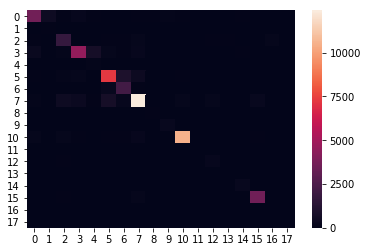

In [167]:
sns.heatmap(finalScore1)
plt.show()

1. we get almost 82% accuracy score on testing dataset which is not bad , we can again increase this by analysing and modifying trainig dataset or applying other methods of vector creation
2. From confusion matrix it very difficult to understand the result
3. but classification report gives fair idea about results, those products which are high in counts gives good accuracy than less number of count.

Reference :https://towardsdatascience.com/multi-class-text-classification-with-lstm-1590bee1bd17